In [533]:
from pandas import DataFrame
import numpy as np
from PIL import Image
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline

# To start our classification using KNN we need a list of the images we are going to use.

This digit.txt file was generated using the linux terminal command "ls <imagefolder> | cat>digit.txt"

In [534]:
label_file = open("digit.txt","r")
labels = label_file.read().splitlines()
label_file.close()

In [550]:
labels = [elem for elem in labels if (elem  != "" and elem != " ")] # remove any entries that are blank or spaces
len(labels) == 1000 #check that no cleaned data has been lost

True

In [536]:
def pbm_to_mat(imagename):
    filename = "digit/"+imagename 
    image_f = open(filename,"r")
    image = image_f.read().split()
    image_f.close()
    del image[0:3]
    range(len(image))
    mat = np.asarray(list(image[0]))
    for step in range(1,len(image)):
        arr = np.asarray(list(image[step]))
        arr = list(map(int, arr))
        mat = np.vstack((mat, arr))
    return mat

In [537]:
matricies = []
for step in range(len(labels)):
    matricies.append(pbm_to_mat(labels[step]))
matricies = np.float_(matricies) #convert the list to a float

(70, 50)

# From examining the labels we know that there are 100 of each digit 0-9 in sequence. This makes labeling them super easy

In [538]:

labels = (np.zeros((100),dtype=np.int)) #make the first 100 zeros so we can stack the others on top with a loop
for x in range(1,10):
    n = x * np.ones((100),dtype=np.int)
    labels = np.hstack((labels,n))

1

# Now we can make a function to calculate the distances of the matricies

We can just calculate the distance from itself. It's just going to be trivially zero so we can ignore it

In [551]:
def euclidean_dist(instance1, instance2):
    error = (instance1 - instance2)
    norm = np.sum(np.dot(error.T,error))
    return np.sqrt(norm)

## Now to make a function that calculates all of the distances, organizes them and casts the votes as to what the algorithm thinks the digit is

In [559]:
def KNN(test,k):
    dist_l = []
    for i in range(len(labels)):
        dist = (euclidean_dist(test, matricies[i]))
        dist_l.append(dist)
    dist_l = np.array(dist_l)
    df = DataFrame({'distance':dist_l, 'Label':labels })

    df.sort_values(by='distance')
    ranked = df.sort_values(by='distance') #sort by distance and take the first 5 entries of df
    ranked.drop(df.index[0]) #least distance is arbitrarily itself
    srank = (ranked.reset_index(drop=True)) #reindex the label to rank distance
    srank = srank.drop(srank.index[0])
    srank = srank.drop(srank.index[range(k,len(srank.index))]) #take the top k neighbours

    q = srank['Label'].value_counts()
    pt = q.plot.bar()
    pt.set_ylabel("Number of 'votes' in neighbourhood")
    pt.set_xlabel("Digit observed")
    return q

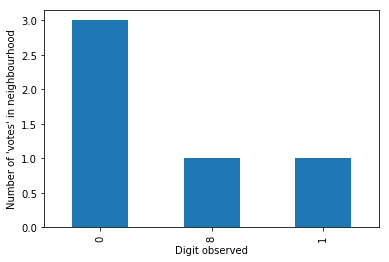

In [561]:
l = KNN(matricies[10],5)